In [1]:
import pickle
import os
# import torch
import numpy as np
import pandas as pd
import scipy.io
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from scipy import signal
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statistics import mean
import plotly.graph_objects as go
from scipy.interpolate import griddata
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import tqdm

# jupyter notebook display setting for all data structures
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
np.set_printoptions(threshold=np.inf)

# Paper Plotter (ChIP-seq)

In [45]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import griddata
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

# def bubble_plotter_paper(matrix_prob, filename):
#     x = np.linspace(0, 199, 200)  # x-axis: for bps
#     y = np.linspace(0, 20, 20)  # y-axis: bubble length
#     x, y = np.meshgrid(x, y, indexing="ij")
    
#     region = np.s_[:, 3:15]
#     x, y = x[region], y[region]

#     xf, yf = x.flatten(), y.flatten()

#     xnew = np.linspace(x.min(), x.max(), 100)
#     ynew = np.linspace(y.min(), y.max(), 100)
#     Xnew, Ynew = np.meshgrid(xnew, ynew)

#     min_bubble_length_index = np.argmin(np.abs(ynew - 3))
#     bp_indices = np.where((xnew >= 50) & (xnew <= 51))[0]

#     def getznew(probability_tensor, th_idx):
#         z = probability_tensor[:, :, th_idx]
#         z = z[region]
#         zf = z.flatten()
#         Znew = griddata((xf, yf), zf, (Xnew, Ynew), method='cubic')
#         return Znew

#     TRESHOLDS = [i/10 for i in range(5, 105, 5)]

#     fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 16), sharex="col", sharey="col")
#     fig.tight_layout(pad=3)
#     fontsize = 14

#     for i in range(4):
#         idx = i * 2
#         th = TRESHOLDS[idx]

#         wt_Znew = getznew(matrix_prob, idx)

#         ax0 = fig.add_subplot(4, 2, 2 * i + 1, projection='3d')
#         ax1 = fig.add_subplot(4, 2, 2 * i + 2)
        
#         ax0.plot_surface(Xnew, Ynew, wt_Znew, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
#         ax0.set_title(f"$Thr (Å)$: {th}", fontsize=fontsize, fontweight='bold', y=1)
#         ax0.grid(False)

#         ax0.set_xlabel('Base pairs', fontsize=fontsize)
#         ax0.set_ylabel('Bubble length', fontsize=fontsize, labelpad=10)
#         # the probability label should be further away from the plot
#         ax0.set_zlabel('Bubble Probability', fontsize=fontsize, labelpad=10)

#         heatmap = ax1.imshow(wt_Znew, aspect='auto', cmap='jet', origin='lower', extent=[xnew.min(), xnew.max(), ynew.min(), ynew.max()])
#         # fig.colorbar(heatmap, ax=ax1, orientation='vertical')
#         cbar = fig.colorbar(heatmap, ax=ax1, orientation='vertical')
#         cbar.set_label('Bubble Probability', fontsize=fontsize)
#         ax1.set_title(f"$Thr (Å)$: {th}", fontsize=fontsize, fontweight='bold')
        
#         ax1.set_xlabel('Base pairs', fontsize=fontsize)
#         ax1.set_ylabel('Bubble length', fontsize=fontsize)

#         # ax1.set_xticks([0, 50, 100, 150, 200])
#         # ax1.set_yticks([0, 5, 10, 15, 20])

#     fig.subplots_adjust(hspace=0.4, wspace=0.4)

#     # Remove any extra axes
#     for ax in axs.flatten():
#         if not ax.has_data():
#             fig.delaxes(ax)
    
#     plt.savefig('/scratch/midway3/waqaas/DNA-breathing/figs/paper/chipseq_tensor_heatmap.png')
#     plt.show()

# # Example usage
# # matrix_prob = np.random.rand(200, 20, 20)  # Example tensor, replace with actual data
# # bubble_plotter(matrix_prob, 'Example Filename')


In [38]:
# with open('/scratch/midway3/waqaas/DNA-breathing/data/chipseq_features/compiled_bubble_data/chipseq_3.pkl', 'rb') as f:
#     bubbles = pickle.load(f)

In [39]:
# for seq_id in bubbles.keys():
#     data_instance = bubbles[seq_id]['bubbles']
#     break

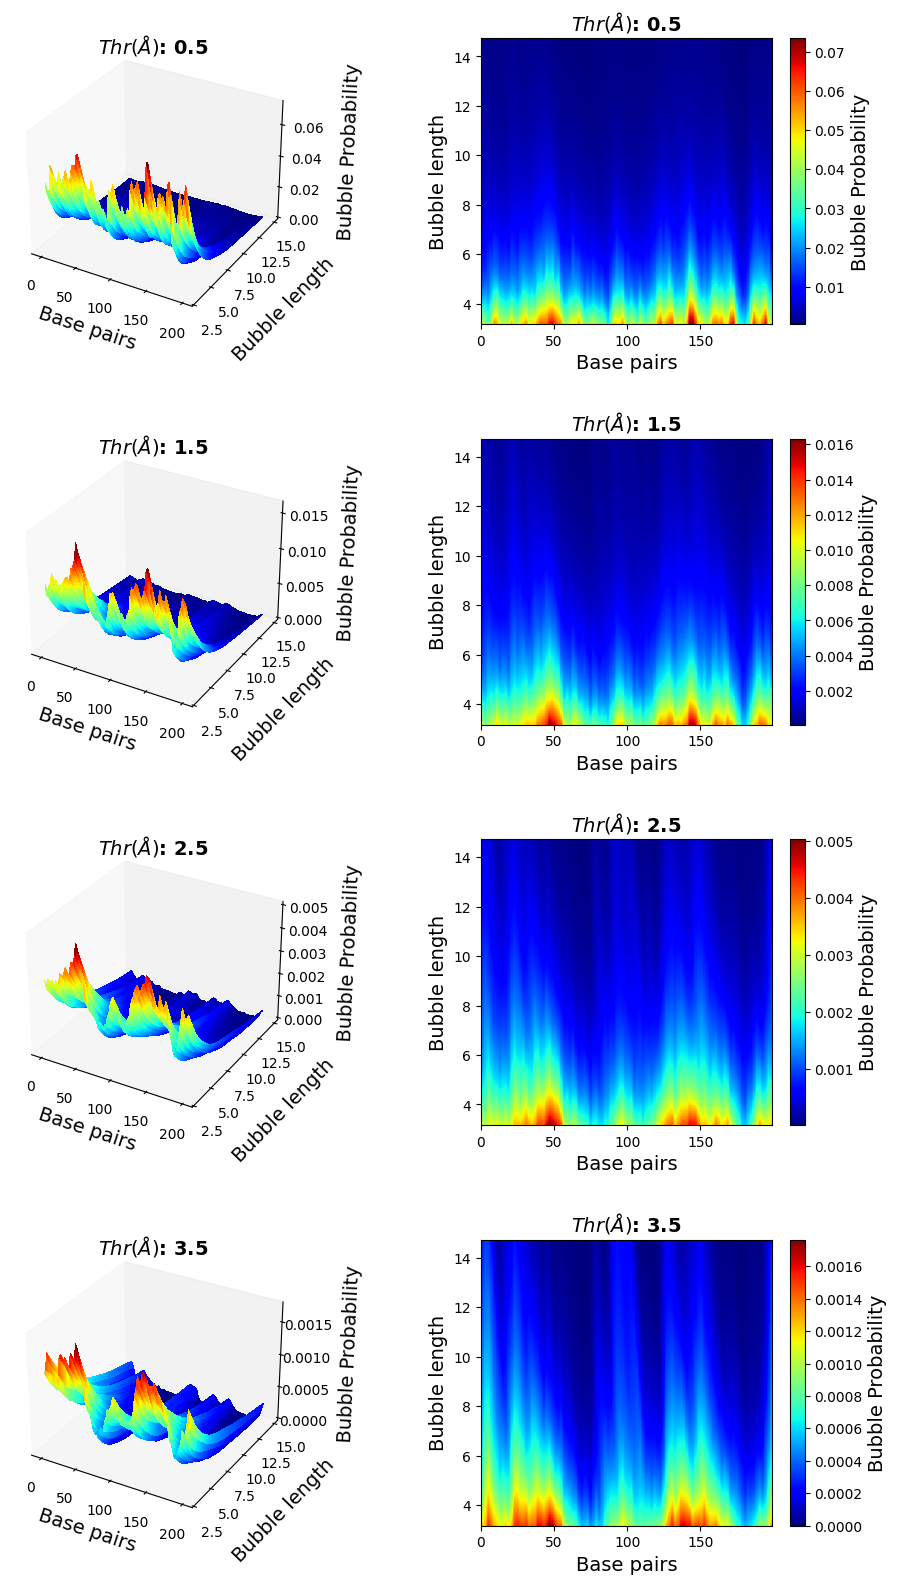

In [46]:
# bubble_plotter_paper(data_instance/80000, 'chIP-seq')

# Paper Plotter (gcPBM)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.gridspec import GridSpec

def bubble_plotter_paper_gcPBM(matrix_prob, filename, flipping_prob, bp_range=None):
    x = np.linspace(0, 35, 36)  # x-axis: for bps
    y = np.linspace(0, 20, 20)  # y-axis: bubble length
    x, y = np.meshgrid(x, y, indexing="ij")
    
    region = np.s_[:, 3:15]
    x, y = x[region], y[region]

    xf, yf = x.flatten(), y.flatten()

    xnew = np.linspace(x.min(), x.max(), 100)
    ynew = np.linspace(y.min(), y.max(), 100)
    Xnew, Ynew = np.meshgrid(xnew, ynew)

    def getznew(probability_tensor, th_idx):
        z = probability_tensor[:, :, th_idx]
        z = z[region]
        zf = z.flatten()
        Znew = griddata((xf, yf), zf, (Xnew, Ynew), method='cubic')
        return Znew

    TRESHOLDS = [i/10 for i in range(5, 105, 5)]

    fig = plt.figure(figsize=(26, 6))
    gs = GridSpec(1, 3, figure=fig)
    fontsize = 18
    tick_size = 16

    for i in range(1):
        idx = 6
        th = TRESHOLDS[idx]

        wt_Znew = getznew(matrix_prob, idx)

        ax0 = fig.add_subplot(gs[0, 0], projection='3d')
        ax1 = fig.add_subplot(gs[0, 1])
        
        ax0.plot_surface(Xnew, Ynew, wt_Znew, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
        ax0.set_title(f"$Thr (Å)$: {th}", fontsize=fontsize, fontweight='bold', y=1)
        ax0.grid(False)

        ax0.set_xlabel('Base pairs', fontsize=fontsize, labelpad=10)
        ax0.set_ylabel('Bubble length', fontsize=fontsize, labelpad=10)
        ax0.set_zlabel('Bubble Probability', fontsize=fontsize, labelpad=30)

        # Set y-ticks for 3D plot
        ax0.set_yticks(np.arange(4, ynew.max() + 1, 2))
        ax0.zaxis.set_tick_params(pad=14, labelsize=tick_size)
        ax0.xaxis.set_tick_params(labelsize=tick_size)
        ax0.yaxis.set_tick_params(labelsize=tick_size)

        heatmap = ax1.imshow(wt_Znew, aspect='auto', cmap='jet', origin='lower', extent=[xnew.min(), xnew.max(), ynew.min(), ynew.max()])
        cbar = fig.colorbar(heatmap, ax=ax1, orientation='vertical')
        cbar.set_label('Bubble Probability', fontsize=fontsize)
        cbar.ax.tick_params(labelsize=tick_size)
        ax1.set_title(f"$Thr (Å)$: {th}", fontsize=fontsize, fontweight='bold')
        
        ax1.set_xlabel('Base pairs', fontsize=fontsize)
        ax1.set_ylabel('Bubble length', fontsize=fontsize)
            
        # Set y-ticks for heatmap
        ax1.set_yticks(np.arange(4, ynew.max() + 1, 2))
        ax1.tick_params(axis='both', which='major', labelsize=tick_size)

        # Draw red box around specified base pair range
        if bp_range:
            bp_min, bp_max = bp_range
            ax1.add_patch(plt.Rectangle((bp_min, ynew.min()), bp_max - bp_min, ynew.max() - ynew.min(), 
                                        edgecolor='red', facecolor='none', lw=2))
            
            # Draw 3D box with reduced opacity
            z_min, z_max = 0, wt_Znew.max()
            x_corners = [bp_min, bp_min, bp_max, bp_max, bp_min, bp_min, bp_max, bp_max]
            y_corners = [ynew.min(), ynew.max(), ynew.max(), ynew.min(), ynew.min(), ynew.max(), ynew.max(), ynew.min()]
            z_corners = [z_min, z_min, z_min, z_min, z_max, z_max, z_max, z_max]

            # Draw edges connecting the bottom and top faces
            for start, end in [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (1, 5), (2, 6)]:
                ax0.plot([x_corners[start], x_corners[end]],
                         [y_corners[start], y_corners[end]],
                         [z_corners[start], z_corners[end]],
                         color='red', lw=2, alpha=0.5)
            
            # Draw the front-facing vertical lines last with higher zorder
            front_faces = [(0, 4), (3, 7)]
            for start, end in front_faces:
                ax0.plot([x_corners[start], x_corners[end]],
                         [y_corners[start], y_corners[end]],
                         [z_corners[start], z_corners[end]],
                         color='red', lw=2, alpha=0.5, zorder=10)

    # Plot the flipping probability line plot
    ax2 = fig.add_subplot(gs[0, 2])
    ax2.plot(x[:, 0], flipping_prob, marker='o', linestyle='-', color='b')
    ax2.set_title("$Thr (Å)$: 0.707106781186548", fontsize=fontsize, fontweight='bold', y=1)
    ax2.set_xlabel('Base pairs', fontsize=fontsize)
    ax2.set_ylabel('Flipping Probability', fontsize=fontsize)
    ax2.tick_params(axis='both', which='major', labelsize=tick_size)

    # Draw red box in the flipping probability plot
    if bp_range:
        bp_min, bp_max = bp_range
        ax2.axvspan(bp_min, bp_max, color='red', alpha=0.3)

    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.savefig('/scratch/midway3/waqaas/DNA-breathing/figs/paper/gcpbm_tensor_heatmap_supplementary.png')
    plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.gridspec import GridSpec

from matplotlib.ticker import FormatStrFormatter

def plot_tensor_maps_bubble(matrix_prob, threshold_indices, title, filename):
    x = np.linspace(0, 35, 36)  # x-axis: for bps
    y = np.linspace(0, 20, 20)  # y-axis: bubble length
    x, y = np.meshgrid(x, y, indexing="ij")
    
    region = np.s_[:, 3:15]
    x, y = x[region], y[region]

    xf, yf = x.flatten(), y.flatten()

    xnew = np.linspace(x.min(), x.max(), 100)
    ynew = np.linspace(y.min(), y.max(), 100)
    Xnew, Ynew = np.meshgrid(xnew, ynew)

    def getznew(probability_tensor, th_idx):
        z = probability_tensor[:, :, th_idx]
        z = z[region]
        zf = z.flatten()
        Znew = griddata((xf, yf), zf, (Xnew, Ynew), method='cubic')
        return Znew

    num_thresholds = len(threshold_indices)
    fig, axs = plt.subplots(1, num_thresholds, figsize=(14 * num_thresholds, 7), subplot_kw={'projection': '3d'})
    fig.suptitle(title, fontsize=18, fontweight='bold')

    for i, idx in enumerate(threshold_indices):
        wt_Znew = getznew(matrix_prob, idx)
        ax = axs[i]
        
        surf = ax.plot_surface(Xnew, Ynew, wt_Znew, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
        ax.set_title(f"$Thr (Å)$: {(idx+1)/2}", fontsize=18, fontweight='bold', y=1)
        ax.grid(False)

        ax.set_xlabel('Base pairs', fontsize=18, labelpad=10)
        ax.set_ylabel('Bubble length', fontsize=18, labelpad=10)
        ax.set_zlabel('Bubble Probability', fontsize=18, labelpad=30)

        # Set y-ticks for 3D plot
        ax.set_yticks(np.arange(4, ynew.max() + 1, 2))
        ax.zaxis.set_tick_params(pad=14, labelsize=16)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)

        # Set z-ticks to 4 decimal places
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.4f'))

    # Add a single color bar for all subplots
    cbar = fig.colorbar(surf, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Bubble Probability', fontsize=18)
    cbar.ax.tick_params(labelsize=16)

    plt.savefig(filename)
    plt.show()

def plot_tensor_map_flip(matrix_prob, title, filename):
    x = np.linspace(0, 35, 36)  # x-axis: for bps
    y = np.linspace(1, 5, 5)  # y-axis: bubble length
    x, y = np.meshgrid(x, y, indexing="ij")
    
    region = np.s_[:, :]
    x, y = x[region], y[region]

    xf, yf = x.flatten(), y.flatten()

    xnew = np.linspace(x.min(), x.max(), 100)
    ynew = np.linspace(y.min(), y.max(), 100)
    Xnew, Ynew = np.meshgrid(xnew, ynew)

    def getznew(probability_tensor):
        z = probability_tensor[:, :]
        z = z[region]
        zf = z.flatten()
        Znew = griddata((xf, yf), zf, (Xnew, Ynew), method='cubic')
        return Znew

    wt_Znew = getznew(matrix_prob)
    log_wt_Znew = np.log10(wt_Znew + 1e-10)  # Adding a small value to avoid log(0)

    fig = plt.figure(figsize=(23, 7))  # Increased vertical size

    # Original probability plot
    ax0 = fig.add_subplot(121, projection='3d')
    ax0.plot_surface(Xnew, Ynew, wt_Znew, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
    ax0.set_title(f"{title}", fontsize=18, fontweight='bold', y=1)
    ax0.grid(False)
    ax0.set_xlabel('Base pairs', fontsize=18, labelpad=10)
    ax0.set_ylabel('Coordinate Distance\nThreshold (Å)', fontsize=18, labelpad=25)
    ax0.set_zlabel('Flipping Probability', fontsize=18, labelpad=25)
    ax0.set_yticks([1,2,3,4,5])
    ax0.set_yticklabels(['0.707', '1.414', '2.121', '2.828', '3.536'])
    ax0.zaxis.set_tick_params(pad=14, labelsize=16)
    ax0.xaxis.set_tick_params(labelsize=16)
    ax0.yaxis.set_tick_params(labelsize=16)

    # Log10 probability plot
    ax1 = fig.add_subplot(122, projection='3d')
    ax1.plot_surface(Xnew, Ynew, log_wt_Znew, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
    ax1.set_title(f"{title}", fontsize=18, fontweight='bold', y=1)
    ax1.grid(False)
    ax1.set_xlabel('Base pairs', fontsize=18, labelpad=10)
    ax1.set_ylabel('Coordinate Distance Threshold (Å)', fontsize=18, labelpad=25)
    ax1.set_zlabel('Log10 Flipping Probability', fontsize=18, labelpad=25)
    ax0.set_yticks([1,2,3,4,5])
    ax0.set_yticklabels(['0.707', '1.414', '2.121', '2.828', '3.536'])
    ax1.zaxis.set_tick_params(pad=14, labelsize=16)
    ax1.xaxis.set_tick_params(labelsize=16)
    ax1.yaxis.set_tick_params(labelsize=16)

    plt.savefig(filename)
    plt.show()

def plot_heatmap_bubble(matrix_prob, title, filename, bp_range=None):
    x = np.linspace(0, 35, 36)  # x-axis: for bps
    y = np.linspace(0, 20, 20)  # y-axis: bubble length
    x, y = np.meshgrid(x, y, indexing="ij")
    
    region = np.s_[:, 3:15]
    x, y = x[region], y[region]

    xf, yf = x.flatten(), y.flatten()

    xnew = np.linspace(x.min(), x.max(), 100)
    ynew = np.linspace(y.min(), y.max(), 100)
    Xnew, Ynew = np.meshgrid(xnew, ynew)

    def getznew(probability_tensor, th_idx):
        z = probability_tensor[:, :, th_idx]
        z = z[region]
        zf = z.flatten()
        Znew = griddata((xf, yf), zf, (Xnew, Ynew), method='cubic')
        return Znew

    wt_Znew = getznew(matrix_prob, 6)

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    
    heatmap = ax1.imshow(wt_Znew, aspect='auto', cmap='jet', origin='lower', extent=[xnew.min(), xnew.max(), ynew.min(), ynew.max()])
    cbar = fig.colorbar(heatmap, ax=ax1, orientation='vertical')
    cbar.set_label('Bubble Probability', fontsize=18)
    cbar.ax.tick_params(labelsize=16)
    ax1.set_title("$Thr (Å)$: 3.5", fontsize=18, fontweight='bold')
    
    ax1.set_xlabel('Base pairs', fontsize=18)
    ax1.set_ylabel('Bubble length', fontsize=18)
        
    # Set y-ticks for heatmap and move them up by 0.5
    y_ticks = np.arange(4, ynew.max() + 1, 2)
    ax1.set_yticks(y_ticks + 0.5)
    ax1.set_yticklabels([str(int(tick)) for tick in y_ticks])
    ax1.tick_params(axis='both', which='major', labelsize=16)

    # Draw red box around specified bubble length
    if bp_range:
        bp_min, bp_max = bp_range
        ax1.axhspan(bp_min, bp_max, color='red', alpha=0.3)

    plt.savefig(filename)
    plt.show()

def plot_heatmap_flip(matrix_prob, title, filename, bp_range=None):
    x = np.linspace(0, 35, 36)  # x-axis: for bps
    y = np.linspace(0, 5, 5)  # y-axis: bubble length
    x, y = np.meshgrid(x, y, indexing="ij")
    
    region = np.s_[:, :]
    x, y = x[region], y[region]

    xf, yf = x.flatten(), y.flatten()

    xnew = np.linspace(x.min(), x.max(), 100)
    ynew = np.linspace(y.min(), y.max(), 100)
    Xnew, Ynew = np.meshgrid(xnew, ynew)

    def getznew(probability_tensor):
        z = probability_tensor[:, :]
        z = z[region]
        zf = z.flatten()
        Znew = griddata((xf, yf), zf, (Xnew, Ynew), method='cubic')
        return Znew

    wt_Znew = getznew(matrix_prob)

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    
    heatmap = ax1.imshow(wt_Znew, aspect='auto', cmap='jet', origin='lower', extent=[xnew.min(), xnew.max(), ynew.min(), ynew.max()])
    cbar = fig.colorbar(heatmap, ax=ax1, orientation='vertical')
    cbar.set_label('Flipping Probability', fontsize=18)
    cbar.ax.tick_params(labelsize=16)
    ax1.set_title(title, fontsize=18, fontweight='bold')
    
    ax1.set_xlabel('Base pairs', fontsize=18)
    ax1.set_ylabel('Coordinate Distance Threshold (Å)', fontsize=18)
        
    # Set y-ticks for heatmap
    y_ticks = np.arange(1, ynew.max() + 1, 1)
    ax1.set_yticks(y_ticks - 0.5)
    ax1.set_yticklabels(['0.707', '1.414', '2.121', '2.828', '3.536'])
    ax1.tick_params(axis='both', which='major', labelsize=16)

    # Draw red box around specified threshold   
    if bp_range:
        bp_min, bp_max = bp_range
        ax1.axhspan(bp_min, bp_max, color='red', alpha=0.3)

    plt.savefig(filename)
    plt.show()

def plot_linegraph(x, y, title, xlabel, ylabel, filename):
    fig = plt.figure(figsize=(7, 6))
    ax2 = fig.add_subplot(111)
    ax2.plot(x, y, marker='o', linestyle='-', color='b')
    ax2.set_title(title, fontsize=18, fontweight='bold')
    ax2.set_xlabel(xlabel, fontsize=18)
    ax2.set_ylabel(ylabel, fontsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=16)

    plt.savefig(filename)
    plt.show()

def plot_bubble_linegraph(x, y, title, xlabel, ylabel, threshold_95, filename):
    fig = plt.figure(figsize=(7, 6))
    ax2 = fig.add_subplot(111)
    ax2.plot(x, y, marker='o', linestyle='-', color='b')
    ax2.axhline(y=threshold_95, color='red', linestyle='--', label='95% Threshold')
    ax2.set_title(title, fontsize=18, fontweight='bold')
    ax2.set_xlabel(xlabel, fontsize=18)
    ax2.set_ylabel(ylabel, fontsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    ax2.legend(fontsize=16)

    plt.savefig(filename)
    plt.show()

def plot_linegraph_adapted(x, y, title, xlabel, ylabel, filename):
    fig = plt.figure(figsize=(7, 6))
    ax2 = fig.add_subplot(111)
    ax2.plot(x, y, marker='o', linestyle='-', color='b')
    ax2.set_title(title, fontsize=18, fontweight='bold')
    ax2.set_xlabel(xlabel, fontsize=18)
    ax2.set_ylabel(ylabel, fontsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    # only have a 0 and 1 y-tick
    ax2.set_yticks([0, 1])

    plt.savefig(filename)
    plt.show()

In [4]:
with open('/scratch/midway3/waqaas/DNA-breathing/data/gcPBM_features/bubble_data/max_gcPBM/1504.pkl', 'rb') as f:
    gcpbm_bubbles = pickle.load(f)

with open('/scratch/midway3/waqaas/DNA-breathing/data/gcPBM_features/compiled_bubble_data/max.pkl', 'rb') as f:
    old_bubbles = pickle.load(f)

In [5]:
# old_bubble = old_bubbles['1504']

flip_instance = gcpbm_bubbles['flip_verbose'][4:-4, :]/80000
data_instance = gcpbm_bubbles['bubbles'][4:-4, :, :]/80000

# implementations

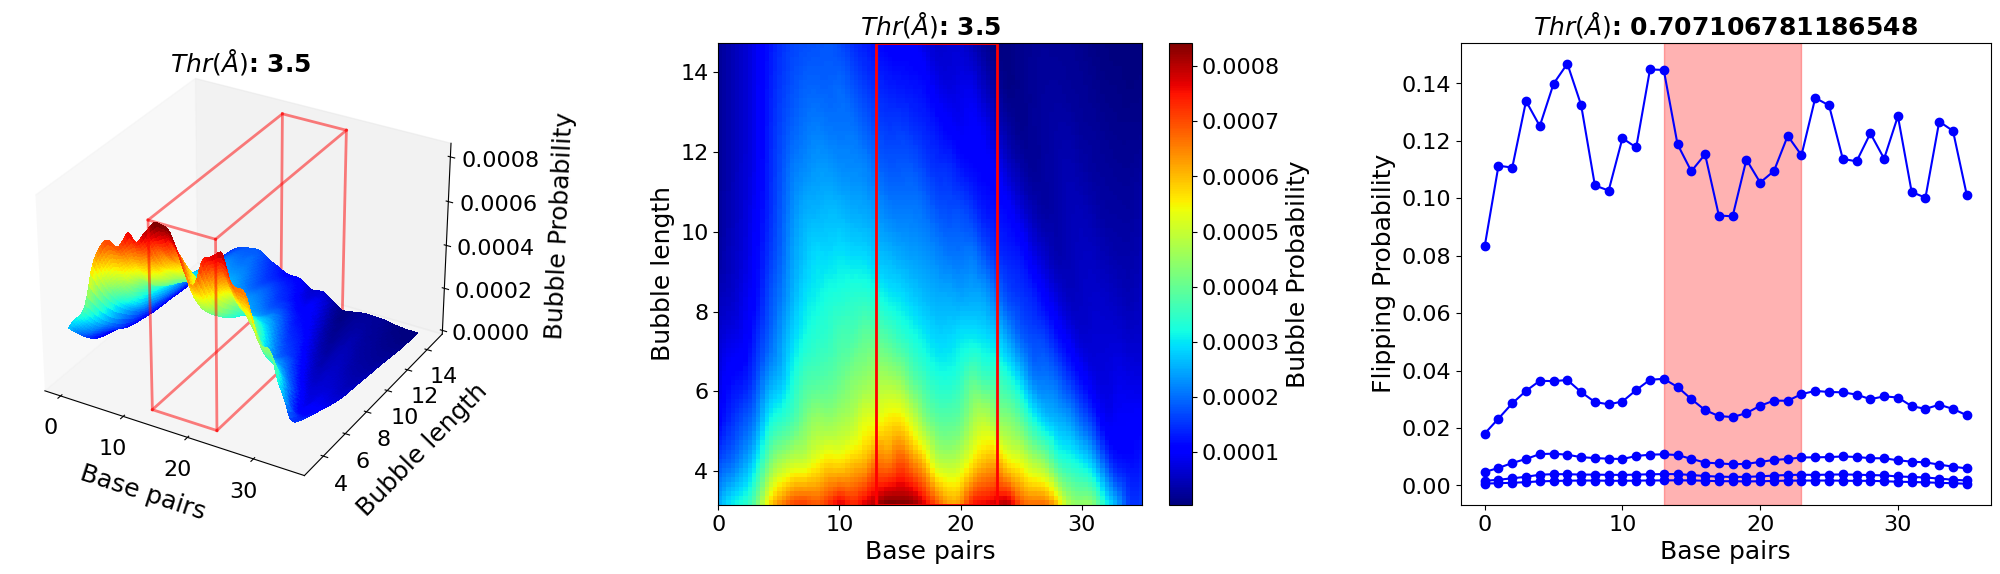

In [37]:
bubble_plotter_paper_gcPBM(data_instance, 'gcPBM', flip_instance, bp_range=(13, 23))

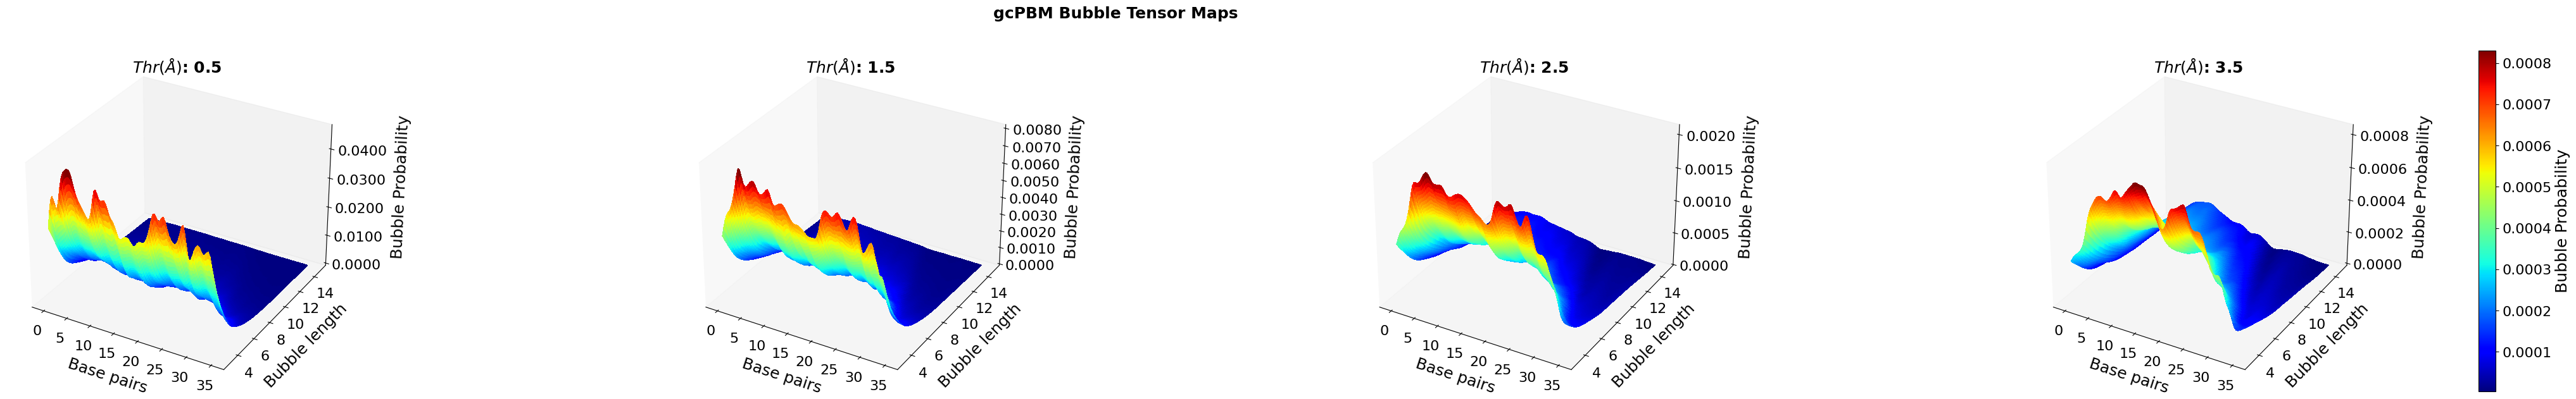

In [6]:
# Generate tensor maps for bubble data at specified Armstrong thresholds
thresholds = [0, 2, 4, 6]
plot_tensor_maps_bubble(data_instance, thresholds, 'gcPBM Bubble Tensor Maps', 'gcPBM_bubble_tensor_maps.png')

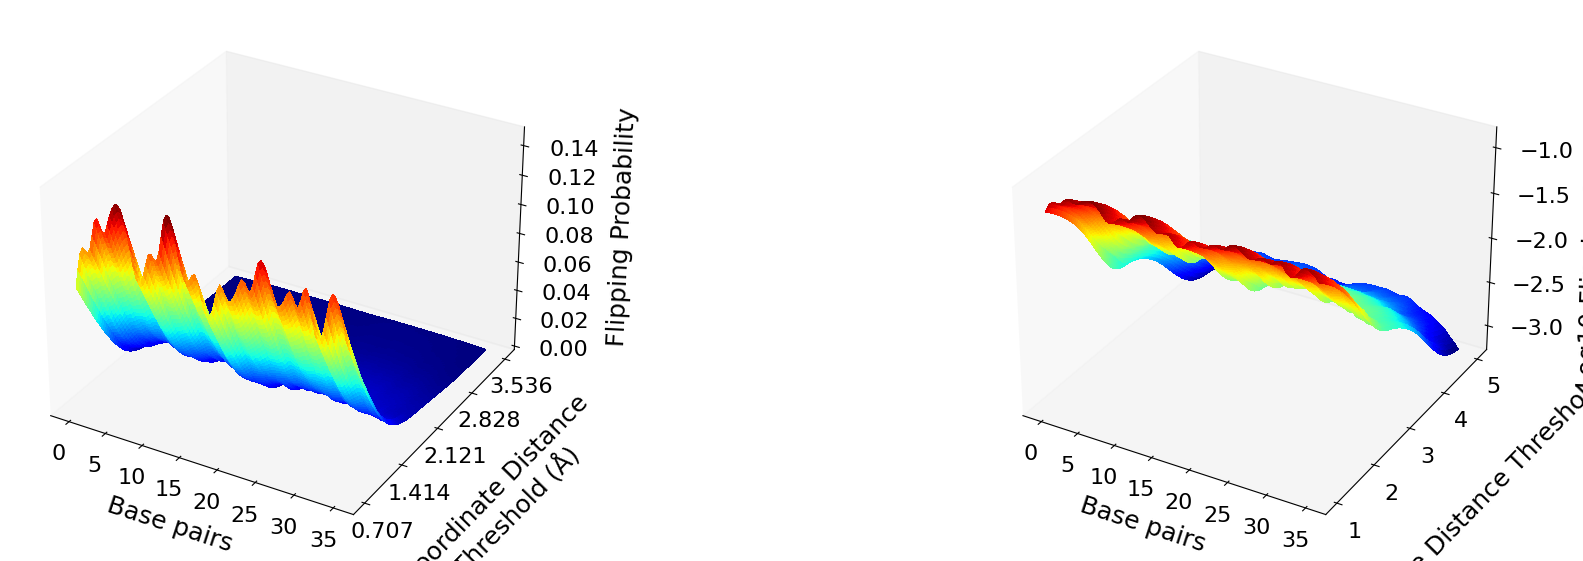

In [55]:
# Generate tensor map for flipping features
plot_tensor_map_flip(flip_instance, '', 'gcPBM_flip_tensor_map.png')

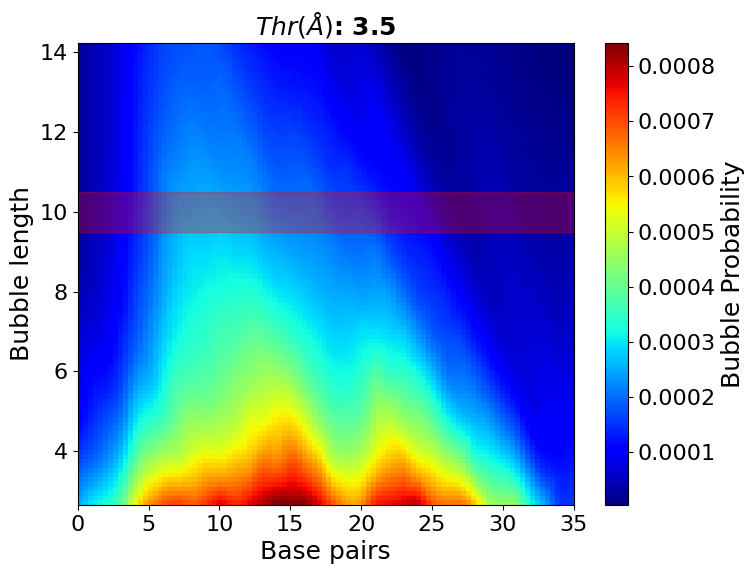

In [66]:
# run the bubble heatmap plotter
plot_heatmap_bubble(data_instance, '', 'gcPBM_bubble_heatmap.png', bp_range=(10, 11))

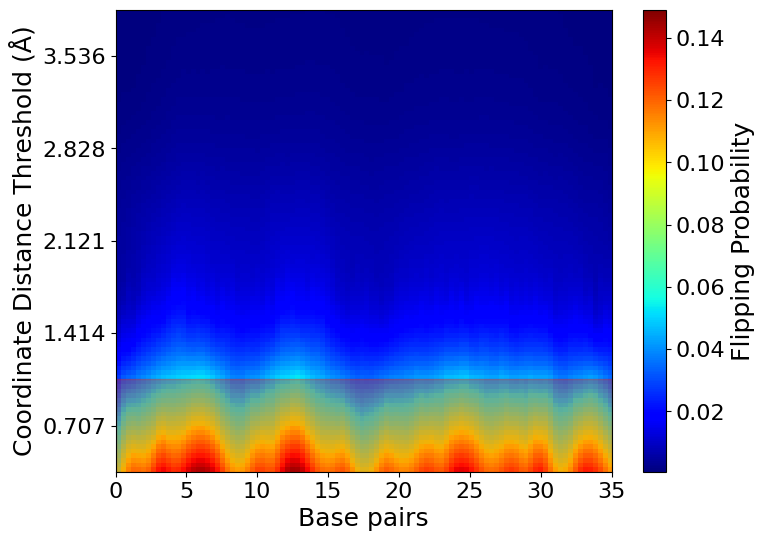

In [75]:
plot_heatmap_flip(flip_instance, '', 'gcPBM_flip_heatmap.png', bp_range=(0, 1))

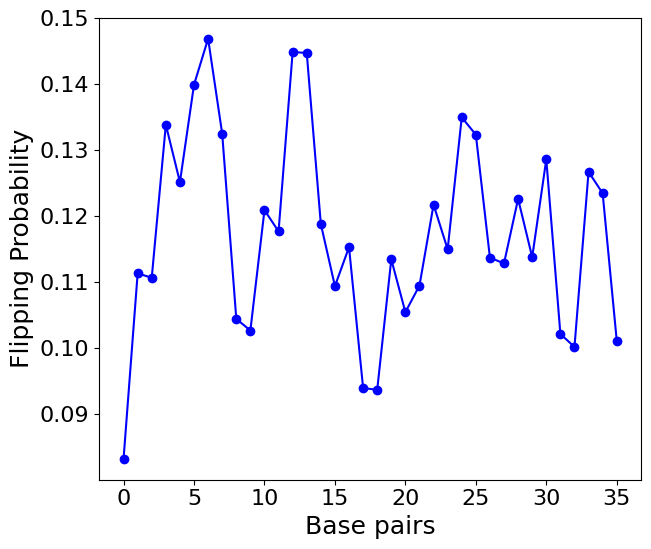

In [67]:
plot_linegraph(np.arange(36), flip_instance[:, 0], '', 'Base pairs', 'Flipping Probability', 'gcPBM_flipping_probability.png')

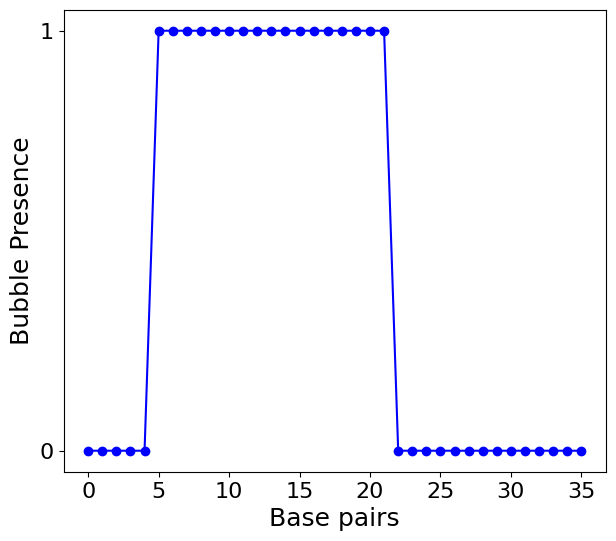

In [68]:
plot_linegraph_adapted(np.arange(36), [1 if i > 0.000149125 else 0 for i in data_instance[:, 10, 6]], '', 'Base pairs', 'Bubble Presence', 'gcPBM_bubble_presence.png')

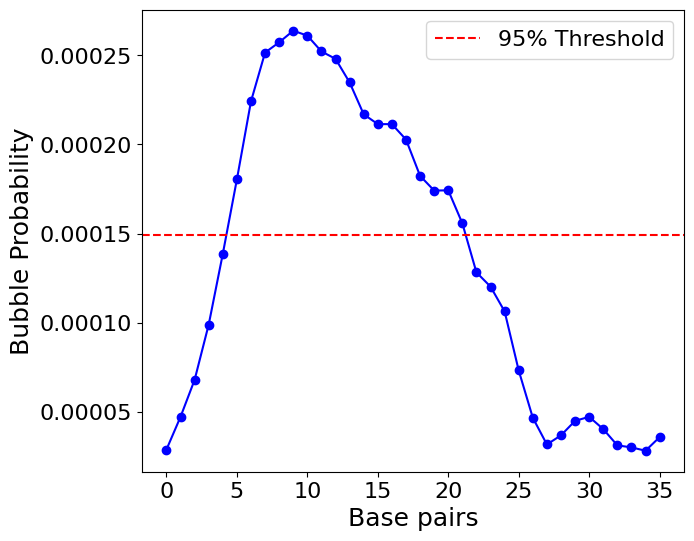

In [69]:
plot_bubble_linegraph(np.arange(36), data_instance[:, 10, 6], '', 'Base pairs', 'Bubble Probability', 0.000149125, 'gcPBM_thresholded_bubble_probability.png')

# File Handlers

In [1]:
location = '/scratch/midway3/waqaas/'
data_folder = f'{location}DNA-breathing/data/chipseq_features/bubble_data/sequences_subset'

In [2]:
# count the total number of files in data_folder
def counter(data_folder):
    count = 0
    for file in os.listdir(data_folder):
        if file.endswith('.pkl'):
            count += 1
    return count

In [3]:
def corrector(seq_file, data_path):
    # make a list of the filenames in the data_path
    filenames = []
    for file in os.listdir(data_path):
        if file.endswith('.pkl'):
            filenames.append(file.split('.')[0])
    # open the seq_file
    with open(seq_file, 'r') as f:
        seq = f.read()
        # if the first column of a line in seq_file is in the filenames list, then delete that line
        for line in seq.splitlines():
            if line.split(' ')[0] in filenames:
                seq = seq.replace(line, '')
        # remove all empty lines
        seq = os.linesep.join([s for s in seq.splitlines() if s])
        # write the corrected seq_file
        with open(seq_file, 'w') as f:
            f.write(seq)

# corrector('/project2/xinhe/waqaas/DNA-breathing/data/chipseq_features/bubble_data/sequences.txt', data_folder)
            

In [4]:
def pkl_compiler(data_path, output_path):
    # initiate a dictionary to store all the data
    data_dict = {}
    for file in os.listdir(data_path):
        if file.endswith('.pkl'):
            with open(os.path.join(data_path, file), 'rb') as f:
                data = pickle.load(f)
                matrix = data['bubbles']
                # save filename as a variable
                filename = file.split('.')[0]
                # add the data to the dictionary
                data_dict[filename] = matrix
    # save the dictionary as a pickle file
    with open(output_path, 'wb') as f:
        pickle.dump(data_dict, f)

In [5]:
# function to merge compiled data
def merge_data(TF, directory):
    # initiate a dictionary to store all the data
    data_dict = {}
    # iterate over the files in the directory that have the TF name
    for file in os.listdir(directory):
        if TF in file:
            with open(os.path.join(directory, file), 'rb') as f:
                data = pickle.load(f)
                # add the data to the dictionary
                data_dict.update(data)
    # save the dictionary in the directory as a pickle file
    with open(directory + f'/{TF}.pkl', 'wb') as f:
        pickle.dump(data_dict, f)

In [6]:
def pkl_compiler_multikey(data_path, output_path):
    # initiate a dictionary to store all the data
    data_dict = {}
    for file in os.listdir(data_path):
        if file.endswith('.pkl'):
            with open(os.path.join(data_path, file), 'rb') as f:
                data = pickle.load(f)
                # save filename as a variable
                filename = file.split('.')[0]
                # add the data to the dictionary
                data_dict[filename] = data
    # save the dictionary as a pickle file
    with open(output_path, 'wb') as f:
        pickle.dump(data_dict, f)

In [7]:
def deleter(data_path):
    for file in os.listdir(data_path):
        if file.endswith('.pkl'):
            os.remove(os.path.join(data_path, file))

In [8]:
# check if the sequences in the pkl for max and myc have the flanks or not
def flank_checker(data_path):
    for file in os.listdir(data_path):
        if file.endswith('.pkl'):
            with open(os.path.join(data_path, file), 'rb') as f:
                data = pickle.load(f)
                print(data['bubbles'].shape)
                break

In [11]:
# run counter on the data_folder
count = counter(data_folder)
print(count)

288


In [12]:
# run corrector() on sequences.txt in the data_folder
corrector(f'{location}DNA-breathing/data/chipseq_features/sequence_7tf_subset/sequences_subset.txt', data_folder)

In [13]:
# run pkl_compiler() on the data_folder
pkl_compiler_multikey(data_folder, f'{location}DNA-breathing/data/chipseq_features/compiled_bubble_data/chipseq_3.pkl')

In [14]:
# check if the compiler worked
with open(f'{location}DNA-breathing/data/chipseq_features/compiled_bubble_data/chipseq_3.pkl', 'rb') as f:
    data_dict = pickle.load(f)
    print(len(data_dict)) # 100

288


In [15]:
deleter(data_folder)

In [ ]:
# check length of the merged data
with open(f'{location}DNA-breathing/data/chipseq_features/compiled_bubble_data/chipseq.pkl', 'rb') as f:
    data_dict = pickle.load(f)
    print(len(data_dict)) # 300

# Misc

In [16]:
# split the data.txt into 2 halves
with open('/project2/xinhe/waqaas/DNA-breathing/data/chipseq_features/sequence_7tf_subset/sequences_subset.txt', 'r') as f:
    seq = f.read()
    seq_list = seq.splitlines()
    seq_list1 = seq_list[:3500]
    seq_list2 = seq_list[3500:]
    seq1 = '\n'.join(seq_list1)
    seq2 = '\n'.join(seq_list2)
    with open('/project2/xinhe/waqaas/DNA-breathing/data/chipseq_features/sequence_7tf_subset1/sequences_subset.txt', 'w') as g:
        g.write(seq1)
    with open('/project2/xinhe/waqaas/DNA-breathing/data/chipseq_features/sequence_7tf_subset2/sequences_subset.txt', 'w') as g:
        g.write(seq2)